In [18]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Clustering
Well organizing objects into groups based on their similarity is clustering

## K-Means Clustering
It is an unsupervised learning used to group similar data's in an unlabeled dataset

### ---------------Steps---------------
1. Choose the number of clusters (K): The first step is to choose the number of clusters that you want to group the data points into. This is a hyperparameter that needs to be tuned for your specific dataset.<br>
2. Initialize the cluster centroids: The next step is to initialize the cluster centroids. This can be done by randomly selecting K data points as the initial cluster centroids.<br>
3. Assign each data point to the closest cluster: For each data point, calculate its distance to each cluster centroid. Then, assign the data point to the cluster with the closest centroid.<br>
4. Recompute the cluster centroids: Once all of the data points have been assigned to clusters, recompute the cluster centroids by taking the average of all of the data points in each cluster.<br>

Repeat steps 3 and 4 until the cluster centroids converge: Repeat steps 3 and 4 until the cluster centroids converge. This means that the cluster centroids are no longer changing.

In [4]:
# Importing the dataset
dataset = pd.read_csv("cars (dataset for k means).csv")


In [126]:
# dataset[' cubicinches'].replace(to_replace= ' ', value=110, inplace=True)

# dataset[' cubicinches'][40]
dataset[' cubicinches'] = pd.to_numeric(dataset[' cubicinches'], errors='coerce')
dataset[' weightlbs'] = pd.to_numeric(dataset[' weightlbs'], errors='coerce') # This will change the df to numeric if any error occurs it try different dtype
XX = dataset[dataset.columns[:-1]]
XX[' cubicinches'].fillna(int(XX[' cubicinches'].mean()))
# XX = XX.astype('int')

0      350.0
1       89.0
2      302.0
3      400.0
4       98.0
       ...  
256    305.0
257     91.0
258    232.0
259    232.0
260    250.0
Name:  cubicinches, Length: 261, dtype: float64

In [19]:
X = dataset[dataset.columns[:-1]]
X[' cubicinches'] = X[' cubicinches'][X[' cubicinches'] != " "]
X[ ' weightlbs'] = X[' weightlbs'][X[' weightlbs'] != " "]
X[' weightlbs'].fillna(method='ffill', inplace=True)
X[' cubicinches'].fillna(method='ffill', inplace=True)
# X.drop(X[' cubicinches'] == " ")
X = X.astype('int')
X.head()
X.to_csv('carsTest.csv')
X[' weightlbs'][172]


C:\Users\adity\AppData\Local\Temp\ipykernel_2764\3472852752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[' cubicinches'] = X[' cubicinches'][X[' cubicinches'] != " "]
C:\Users\adity\AppData\Local\Temp\ipykernel_2764\3472852752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ ' weightlbs'] = X[' weightlbs'][X[' weightlbs'] != " "]
C:\Users\adity\AppData\Local\Temp\ipykernel_2764\3472852752.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use ob

2830

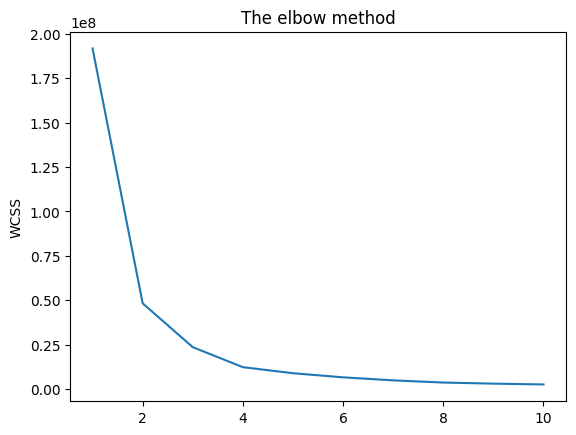

In [20]:
# using the elbow method to find the optimal number of clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("The elbow method")
plt.ylabel("WCSS")
plt.show()

In [21]:
y_kmeans= kmeans.fit_predict(X)
X = X.to_numpy()



AttributeError: PathCollection.set() got an unexpected keyword argument 'labels'

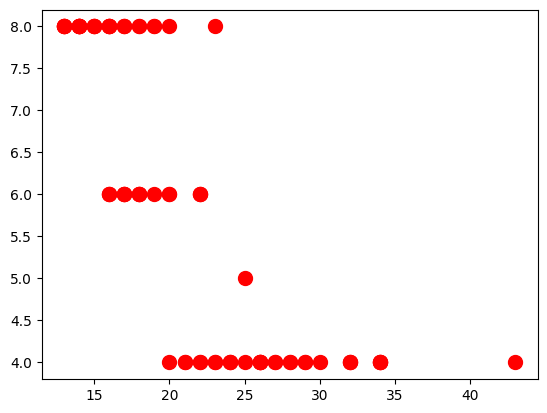

In [22]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans ==0, 1], s=100, c='red', label='Toyota') # {{y_means=rowindex, columnindex}}
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans ==1, 1], s=100, c='red', label='Toyota')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans ==2, 1], s=100, c='red', label='Toyota')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', labels='Centroids')
plt.title("Title of cars")
plt.legend()
plt.show()